### Importing necessary libraries

In [1]:
import pandas as pd
import os

### Importing all the files from Sales_Data folder using os.listdir

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

In [3]:
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


Above listed files are all the csv files in Sales_Data.

### create an empty dataframe to store all the files after merging them into one single file

In [4]:
all_months_data = pd.DataFrame()

In [5]:
type(all_months_data)

pandas.core.frame.DataFrame

In [6]:
for file in files:
    df=pd.read_csv('./Sales_data/'+file)
    all_months_data=pd.concat([all_months_data , df])

In [7]:
all_months_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5791,215416,Wired Headphones,1,11.99,06/05/19 20:31,"485 Sunset St, Boston, MA 02215"
22533,317189,USB-C Charging Cable,1,11.95,12/23/19 13:38,"617 1st St, New York City, NY 10001"
7399,255237,AA Batteries (4-pack),3,3.84,09/23/19 12:28,"652 Center St, San Francisco, CA 94016"
12575,234949,Bose SoundSport Headphones,1,99.99,07/29/19 19:14,"114 North St, San Francisco, CA 94016"
11899,161880,USB-C Charging Cable,1,11.95,02/11/19 08:58,"492 Lake St, San Francisco, CA 94016"
7593,148466,Apple Airpods Headphones,1,150,01/21/19 12:58,"763 Main St, Los Angeles, CA 90001"
3059,298587,USB-C Charging Cable,3,11.95,12/19/19 13:06,"917 South St, Los Angeles, CA 90001"
7800,244136,27in 4K Gaming Monitor,1,389.99,08/23/19 16:52,"585 Park St, Portland, OR 97035"
4409,299856,Lightning Charging Cable,1,14.95,12/18/19 20:40,"479 11th St, Austin, TX 73301"
8322,202002,Google Phone,1,600,05/21/19 10:58,"288 14th St, Boston, MA 02215"


Now, we can see we have sample data from different months.

Let's save this merged file as a csv file.

In [8]:
all_months_data.to_csv('all_data.csv',index=False)

Now , the merged file is saved as 'all_data.csv' in the same folder as this python file .

### Reading updated dataframe

In [9]:
all_data = pd.read_csv('all_data.csv')

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning data

#### Separating month from Order Date

In [11]:
all_data['Month']=all_data['Order Date'].str[0:2]

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


We can see a new column 'Month' has been added to our dataset. There are some rows with NaN values so, let's clean up the dataset by dropping all the rows with NaN values.

In [13]:
data = all_data.dropna()

In [14]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [15]:
all_data.shape

(186850, 7)

In [16]:
data.shape

(186305, 7)

By looking at the shape of all_data and data dataframe , we can see that we have fewer number of rows in data df which we obtained by dropping rows containing NaN values.

In [17]:
all_data_nan_df = all_data[all_data.isna().any(axis=1)]
all_data_nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data_nan_df = data[data.isna().any(axis=1)]
data_nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


There are no any rows containing nan values in out data df. Now we are ready for further analysis.

In [19]:
data['Month'] = data['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

In [20]:
data.loc[data['Month']== 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


These are the rows with have Month as Or . Because of these rows , we got an error when we tried to convert Month from string to integer . Instead of actual date , the Order Date value is filled with string value 'Order Date'. This will cause problems in further analysis so, it is better to drop all the rows with no order date.

In [21]:
data = data.drop(data[data['Month']=='Or'].index)

In [22]:
data.loc[data['Month']== 'Or']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


We have dropped all the rows without Order Date.

In [23]:
data['Month'] = data['Month'].astype('int32')

Now , The Month data are all converted into integer values.

In [24]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### What was the best month for sales? How much was earned that month?

We have to analyze the sales of each month but, we only have Quantity Ordered and price of each product . We can use these two columns to create a 'Sales' column.

In [25]:
data['Sales']=data['Quantity Ordered'] * data['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [26]:
type(data['Quantity Ordered'][3])

str

In [27]:
type(data['Price Each'][3])

str

The value stored in 'Quantity Ordered' and 'Price Each' are string . Because of this, we are getting an error message when we are multiplying these two to get sales data.

In [28]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [29]:
type(data['Quantity Ordered'][3])

numpy.int64

In [30]:
type(data['Price Each'][3])

numpy.float64

Since we have conveted the two columns into the required data type , we can now multiply them to generate sales column.

In [31]:
data['Sales']=data['Quantity Ordered'] * data['Price Each']

In [32]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [33]:
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

data['Month'] = data['Month'].apply(lambda x: look_up[x])

In [34]:
data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
6090,182381,Apple Airpods Headphones,1,150.00,04/02/19 19:21,"623 Jefferson St, Los Angeles, CA 90001",Apr,150.00
28331,246182,Lightning Charging Cable,1,14.95,08/22/19 15:43,"308 Spruce St, Los Angeles, CA 90001",Aug,14.95
25382,243373,AAA Batteries (4-pack),1,2.99,08/10/19 18:34,"424 1st St, Los Angeles, CA 90001",Aug,2.99
96122,214176,AAA Batteries (4-pack),2,2.99,06/11/19 20:41,"756 Pine St, San Francisco, CA 94016",Jun,5.98
13083,189030,Wired Headphones,1,11.99,04/15/19 15:19,"132 2nd St, San Francisco, CA 94016",Apr,11.99
135018,207919,AA Batteries (4-pack),1,3.84,05/26/19 13:33,"483 Maple St, Seattle, WA 98101",May,3.84
176597,249527,Bose SoundSport Headphones,1,99.99,09/25/19 10:43,"594 Cherry St, Portland, OR 97035",Sep,99.99
152005,293020,AAA Batteries (4-pack),1,2.99,11/30/19 16:34,"610 North St, New York City, NY 10001",Nov,2.99
99239,217160,Bose SoundSport Headphones,1,99.99,06/28/19 22:58,"491 Park St, San Francisco, CA 94016",Jun,99.99
162626,266854,Lightning Charging Cable,1,14.95,10/17/19 22:01,"39 Center St, Dallas, TX 75001",Oct,14.95


It is easier to read the name of each month instead of reading the integer value and figuring out which month it is so, we have mapped the integer value to its corresponding month.

In [35]:
result=data.groupby('Month').sum().sort_values(by='Sales' , ascending =False)

result

,Quantity Ordered,Price Each,Sales
Month,,,
Dec,28114,4.588415e+06,4.613443e+06
Oct,22703,3.715555e+06,3.736727e+06
Apr,20558,3.367671e+06,3.390670e+06
Nov,19798,3.180601e+06,3.199603e+06
May,18667,3.135125e+06,3.152607e+06
Mar,17005,2.791208e+06,2.807100e+06
Jul,16072,2.632540e+06,2.647776e+06
Jun,15253,2.562026e+06,2.577802e+06
Aug,13448,2.230345e+06,2.244468e+06


In [36]:
import matplotlib.pyplot as plt

In [37]:
months=result.index
months

Index(['Dec', 'Oct', 'Apr', 'Nov', 'May', 'Mar', 'Jul', 'Jun', 'Aug', 'Feb',
       'Sep', 'Jan'],
      dtype='object', name='Month')

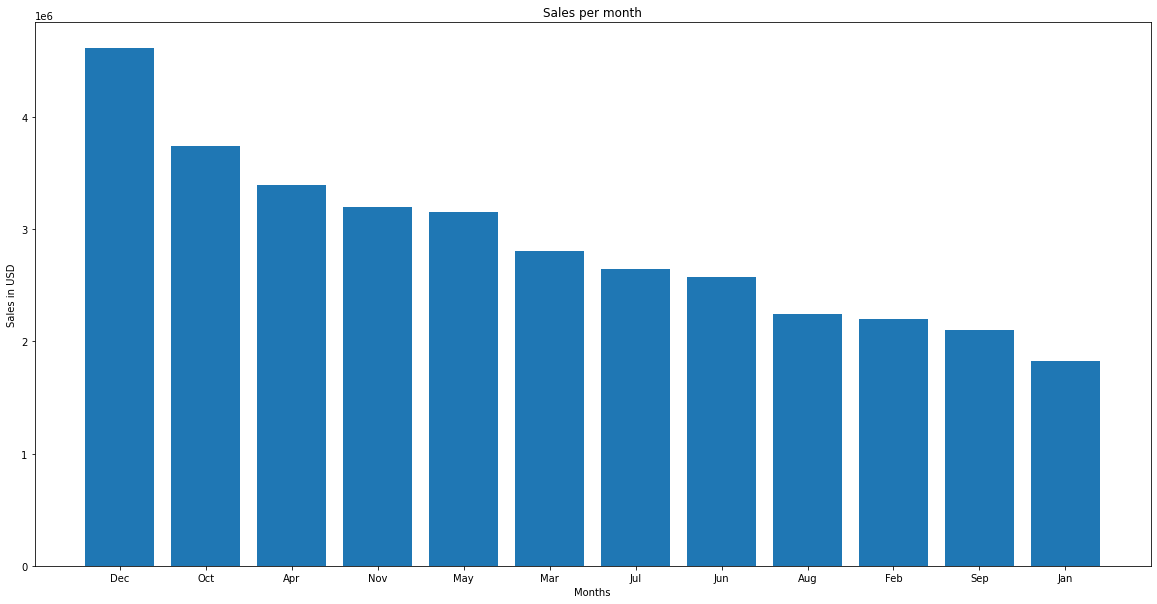

In [38]:
plt.figure(figsize=(20,10))
plt.bar(months ,result.Sales)
plt.title('Sales per month')
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show();

In [39]:
a='ab,cd, ef gh ij'
a

'ab,cd, ef gh ij'

In [40]:
sa = a.split(',')

In [41]:
sa

['ab', 'cd', ' ef gh ij']

In [42]:
type(sa)

list

In [43]:
sa[1]

'cd'

In [44]:
a.split(',')[2].split(' ')[0] #since there is space in front of ef , using index 0 gives us white space instead of ef

''

### Which city has the highest number of sales?

We do not have a city column in out dataset but, we do have Purchase address in string format containing the name of the city. We can use this column to extract city names.

In [45]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

data['City']=data['Purchase Address'].apply(lambda x :get_city(x)+' '+get_state(x)) #apply() uses the split function throghout the column

In [46]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA


Now, we have a new column 'City' containing the city names.Since there may be duplicacy of city name , we have to get the state name as well.

In [47]:
results = data.groupby('City').sum()

In [48]:
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta GA,16602,2.779908e+06,2.795499e+06
Austin TX,11153,1.809874e+06,1.819582e+06
Boston MA,22528,3.637410e+06,3.661642e+06
Dallas TX,16730,2.752628e+06,2.767975e+06
Los Angeles CA,33289,5.421435e+06,5.452571e+06
New York City NY,27932,4.635371e+06,4.664317e+06
Portland ME,2750,4.471893e+05,4.497583e+05
Portland OR,11303,1.860558e+06,1.870732e+06
San Francisco CA,50239,8.211462e+06,8.262204e+06


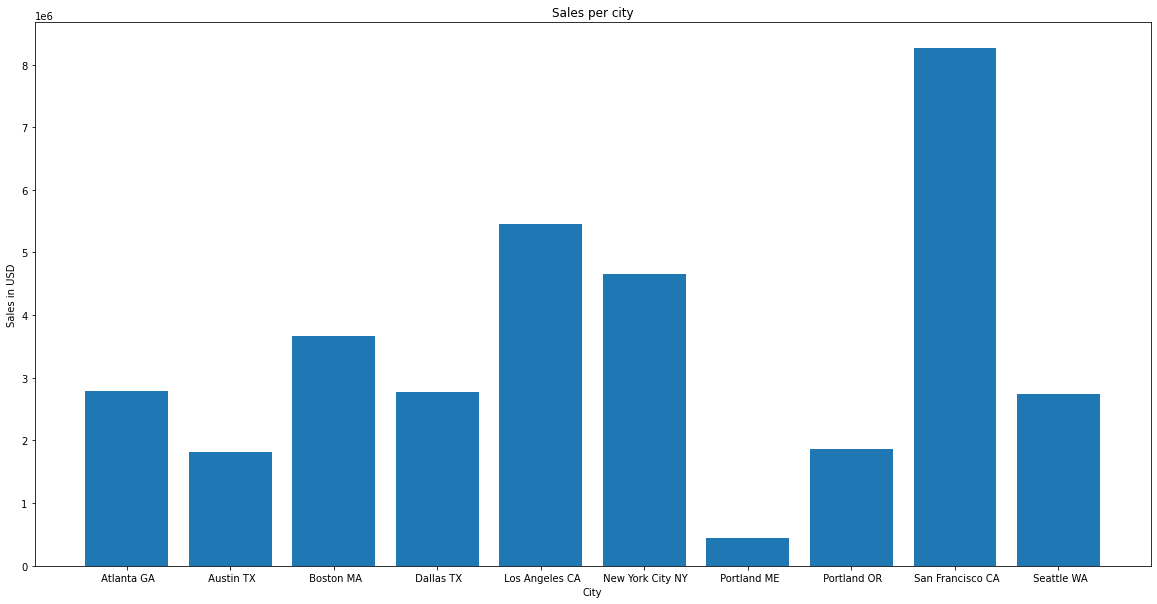

In [49]:
plt.figure(figsize=(20,10))
plt.bar(results.index,results.Sales)
plt.title('Sales per city')
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

### What time should we display advertisements to maximize the likelihood of customer's buying product?

In [50]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [51]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA


In [52]:
data['Hour']=data['Order Date'].dt.hour

In [53]:
data['Minute']=data['Order Date'].dt.minute

In [54]:
data['Count']=1

In [55]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA,9,27,1


In [56]:
hours = data.groupby(['Hour']).count()

In [57]:
hours

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


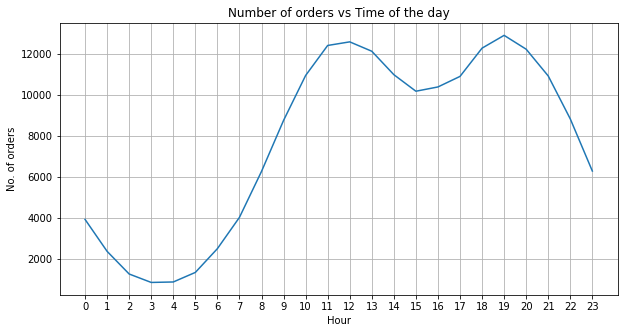

In [58]:
plt.figure(figsize=(10,5))
plt.plot(hours.index,hours.Count)
plt.title('Number of orders vs Time of the day')
plt.xticks(hours.index)
plt.xlabel('Hour')
plt.ylabel('No. of orders')
plt.grid()
plt.show()

Looking at the line chart , we can conculde that the peak time for ordering in 12 in the noon and & 7 pm in the evening so, advertising after 11 am in the morning and 6 pm in the evening can produce more customer orders.

### What product was ordered the most?

In [59]:
result = data.groupby(['Product']).sum()

In [60]:
result.head()

,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Product,,,,,,
20in Monitor,4129,451068.99,454148.71,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916,184331,6230
27in FHD Monitor,7550,1125974.93,1132424.50,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,106118.40,298342,609039,20577


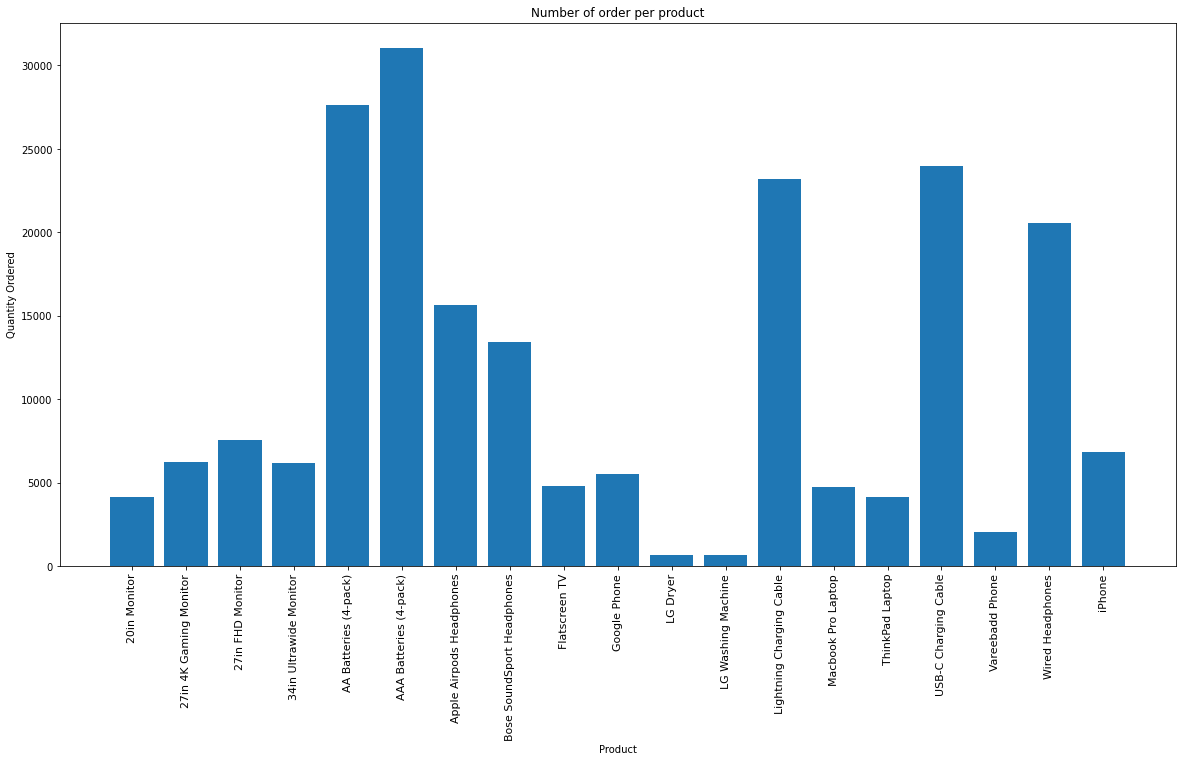

In [90]:
plt.figure(figsize=(20,10))
plt.bar(result.index , result['Quantity Ordered'])
plt.xticks(result.index , rotation = 'vertical', size=11)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Number of order per product')
plt.show()

### Which two products were ordered together the most?

In [62]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA,9,27,1


Here we can see some products have same order ID. It is because they were orderd at the same time by the customer. Grouping the products with same order ID will give us way to find out the products that were ordered together.

In [63]:
df = data[data['Order ID'].duplicated(keep=False)]

In [65]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA,14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA,19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles CA,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston MA,11,31,1


In [66]:
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-66-a80508e795d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles CA,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles CA,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston MA,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [70]:
df=df[['Order ID','grouped']].drop_duplicates() #getting rid of the duplicates 

In [71]:
df

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [72]:
from itertools import combinations
from collections import Counter

In [74]:
count=Counter()

for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [77]:
for key,value in count.most_common(10):##Counter() has most_common method
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


We can use these frequent item sets to make marketing strategies. We can advertise the frequent item sets together in order to attract more customers to buy combination of product instead of a single product.